<a href="https://colab.research.google.com/github/dgonzalezDS/notebooks-collab/blob/main/IMDB_SOLUCION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nuclio Digital School - Máster en Data Science**
## *Profesora: Raquel Revilla*

## **Preprocessing**: Clase 1 - E.D.A. (Exploratory Data Analysis) + Data Cleaning

# 1. Importamos librerias necesarias

In [ ]:
import pandas as pd
import numpy as np

# 2. Conexión con Google Drive y lectura de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#leemos el fichero IMDB
imdb=pd.read_csv("/content/drive/MyDrive/Preprocessing/Data_Cleaning/IMDB.csv")

**DATO**: Internet Movie DataBase, o IMDB, es la base de datos de cine y televisión más importante del mundo. Es una fuente de primer orden no solamente para estudiantes que necesiten fundamentar sus trabajos de historia del cine, por ejemplo, también lo es para investigadores del audiovisual o para profesionales de la producción o la distribución cinematográfica.

In [ ]:
imdb.head()

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
0,Color,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Color,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,English,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,color,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,English,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Color,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,English,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Color,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000


In [ ]:
imdb

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
0,Color,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Color,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,English,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,color,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,English,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Color,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,English,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Color,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Color,Steve McQueen,134,56667870.0,Biography|Drama|History,12 Years a Slave,2013,English,USA,20000000.0,8.1,"Quvenzhané Wallis,Scoot McNairy,Taran Killam",83000
93,Color,Richard J. Lewis,134,7501404.0,Comedy|Drama,Barney's Version,2010,English,Canada,NaN,7.3,"Mark Addy,Atom Egoyan,Paul Gross",0
94,Color,Paul Greengrass,134,107100855.0,Biography|Drama|Thriller,Captain Phillips,2013,English,USA,55000000.0,7.9,"Tom Hanks,Chris Mulkey,Michael Chernus",65000
95,Color,David Ayer,134,85707116.0,Action|Drama|War,Fury,2014,English,USA,68000000.0,7.6,"Brad Pitt,Logan Lerman,Jim Parrack",82000


In [ ]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 86 non-null     object 
 1   director_name         86 non-null     object 
 2   duration              97 non-null     int64  
 3   gross                 89 non-null     float64
 4   genres                96 non-null     object 
 5   movie_title           97 non-null     object 
 6   title_year            97 non-null     int64  
 7   language              97 non-null     object 
 8   country               97 non-null     object 
 9   budget                93 non-null     float64
 10  imdb_score            97 non-null     float64
 11  actors                97 non-null     object 
 12  movie_facebook_likes  97 non-null     int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 10.0+ KB


In [ ]:
imdb.describe()

,duration,gross,title_year,budget,imdb_score,movie_facebook_likes
count,97.000000,8.900000e+01,97.000000,9.300000e+01,97.000000,97.000000
mean,155.515464,1.539379e+08,1975.690722,1.049830e+08,6.871134,65273.453608
std,73.550452,1.412026e+08,258.477165,7.784829e+07,1.939231,58018.198425
min,-50.000000,4.122900e+04,202.000000,1.735000e+04,-7.500000,0.000000
25%,138.000000,4.710508e+07,2012.000000,4.000000e+07,6.500000,24000.000000
50%,143.000000,1.156040e+08,2013.000000,7.800000e+07,7.200000,54000.000000
75%,154.000000,2.410639e+08,2014.000000,1.780000e+08,7.800000,85000.000000
max,650.000000,6.232795e+08,2016.000000,2.500000e+08,8.800000,349000.000000


In [ ]:
imdb.shape

(97, 13)

In [ ]:
imdb.head()

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
0,Color,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Color,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,English,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,color,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,English,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Color,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,English,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Color,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000


In [ ]:
imdb.tail()

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
92,Color,Steve McQueen,134,56667870.0,Biography|Drama|History,12 Years a Slave,2013,English,USA,20000000.0,8.1,"Quvenzhané Wallis,Scoot McNairy,Taran Killam",83000
93,Color,Richard J. Lewis,134,7501404.0,Comedy|Drama,Barney's Version,2010,English,Canada,NaN,7.3,"Mark Addy,Atom Egoyan,Paul Gross",0
94,Color,Paul Greengrass,134,107100855.0,Biography|Drama|Thriller,Captain Phillips,2013,English,USA,55000000.0,7.9,"Tom Hanks,Chris Mulkey,Michael Chernus",65000
95,Color,David Ayer,134,85707116.0,Action|Drama|War,Fury,2014,English,USA,68000000.0,7.6,"Brad Pitt,Logan Lerman,Jim Parrack",82000
96,Color,Clint Eastwood,5,47034272.0,Biography|Drama|Music|Musical,Jersey Boys,2014,English,USA,40000000.0,6.9,"Johnny Cannizzaro,Steve Schirripa,Scott Vance",16000


# 3. EDA + Data Cleaning

## 3.1 Eliminamos duplicados

In [ ]:
imdb[imdb.duplicated(keep=False)]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
8,Color,Joss Whedon,173,623279547.0,Action|Adventure|Sci-Fi,The Avengers,2012,English,USA,220000000.0,8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000
9,Color,Joss Whedon,173,623279547.0,Action|Adventure|Sci-Fi,The Avengers,2012,English,USA,220000000.0,8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000
19,Color,Tom Hooper,158,148775460.0,Drama|Musical|Romance,Les Misérables,2012,English,USA,61000000.0,7.6,"Hugh Jackman,Eddie Redmayne,Anne Hathaway",144000
20,Color,Tom Hooper,158,148775460.0,Drama|Musical|Romance,Les Misérables,2012,English,USA,61000000.0,7.6,"Hugh Jackman,Eddie Redmayne,Anne Hathaway",144000
28,Color,Ridley Scott,150,65007045.0,Action|Adventure|Drama,Exodus: Gods and Kings,2014,English,UK,140000000.0,6.1,"Christian Bale,María Valverde,Ben Mendelsohn",51000
29,Color,Ridley Scott,150,65007045.0,Action|Adventure|Drama,Exodus: Gods and Kings,2014,English,UK,140000000.0,6.1,"Christian Bale,María Valverde,Ben Mendelsohn",51000
50,Color,Sam Mendes,143,304360277.0,Action|Adventure|Thriller,Skyfall,2012,English,UK,200000000.0,7.8,"Albert Finney,Helen McCrory,Rory Kinnear",80000
51,Color,Sam Mendes,143,304360277.0,Action|Adventure|Thriller,Skyfall,2012,English,UK,200000000.0,7.8,"Albert Finney,Helen McCrory,Rory Kinnear",80000
52,Color,Baz Luhrmann,143,144812796.0,Drama|Romance,The Great Gatsby,2013,English,Australia,105000000.0,7.3,"Leonardo DiCaprio,Elizabeth Debicki,Steve Bisley",115000
53,Color,Baz Luhrmann,143,144812796.0,Drama|Romance,The Great Gatsby,2013,English,Australia,105000000.0,7.3,"Leonardo DiCaprio,Elizabeth Debicki,Steve Bisley",115000


In [ ]:
imdb2=imdb.copy()


In [ ]:
imdb2.drop_duplicates(inplace=True)

In [ ]:
imdb2[imdb2.duplicated(keep=False)]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes


In [ ]:
imdb2.isnull().any()

color                    True
director_name            True
duration                False
gross                    True
genres                   True
movie_title             False
title_year              False
language                False
country                 False
budget                   True
imdb_score              False
actors                  False
movie_facebook_likes    False
dtype: bool

In [ ]:
imdb2.isnull().sum()

color                   11
director_name           11
duration                 0
gross                    7
genres                   1
movie_title              0
title_year               0
language                 0
country                  0
budget                   4
imdb_score               0
actors                   0
movie_facebook_likes     0
dtype: int64

## 3.2 Tratamiento de nulos

Analizamos todos los nulos y decidimos qué hacemos con ellos


### 3.1.1 Variable: **color**

In [ ]:
imdb2["color"].value_counts()

Color               78
color                1
 Black and White     1
Name: color, dtype: int64

Apreciamos que *color* tiene 11 vacíos y es una columna que no genera información. Es candidata a eliminarla

In [ ]:
del(imdb2["color"])

### 3.1.2 Variable: **nombre de director**

In [ ]:
imdb2["director_name"].value_counts()

Michael Bay          3
Peter Jackson        3
Christopher Nolan    3
Ridley Scott         3
Martin Scorsese      2
                    ..
Shane Black          1
Adam McKay           1
Zack Snyder          1
Baz Luhrmann         1
Clint Eastwood       1
Name: director_name, Length: 61, dtype: int64

In [ ]:
imdb2[imdb2["director_name"].isnull()]

,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
5,NaN,183,330249062.0,Action|Adventure|Sci-Fi,Batman v Superman: Dawn of Justice,202,English,USA,250000000.0,6.9,"Henry Cavill,Lauren Cohan,Alan D. Purwin",197000
23,NaN,156,183635922.0,Adventure|Drama|Thriller|Western,The Revenant,2015,English,USA,135000000.0,8.1,"Leonardo DiCaprio,Tom Hardy,Lukas Haas",190000
30,NaN,150,182204440.0,Biography|Drama|History|War,Lincoln,2012,English,USA,65000000.0,7.4,"Joseph Gordon-Levitt,Hal Holbrook,Bruce McGill",71000
39,NaN,147,407197282.0,Action|Adventure|Sci-Fi,Captain America: Civil War,2016,English,USA,250000000.0,8.2,"Robert Downey Jr.,Scarlett Johansson,Chris Evans",72000
54,NaN,143,NaN,Drama|Horror|Thriller,The Ridges,2011,English,USA,17350.0,3.0,"Robbie Barnes,Alana Kaniewski,Brandon Landers",33
57,NaN,142,407999255.0,Adventure|Drama|Sci-Fi|Thriller,The Hunger Games,2012,English,USA,78000000.0,7.3,"Jennifer Lawrence,Josh Hutcherson,Anthony Reyn...",140000
69,NaN,139,150832203.0,Adventure|Mystery|Sci-Fi,Divergent,2014,English,USA,85000000.0,6.7,"Kate Winslet,Theo James,Mekhi Phifer",49000
73,NaN,138,150117807.0,Crime|Drama,American Hustle,2013,English,USA,40000000.0,7.3,"Jennifer Lawrence,Christian Bale,Bradley Cooper",63000
80,NaN,137,37304950.0,Biography|Crime|Drama,J. Edgar,2011,English,USA,35000000.0,6.6,"Leonardo DiCaprio,Naomi Watts,Kaitlyn Dever",16000
82,NaN,137,281666058.0,Adventure|Sci-Fi,The Hunger Games: Mockingjay - Part 2,2015,English,USA,160000000.0,6.6,"Jennifer Lawrence,Philip Seymour Hoffman,Josh ...",38000


In [ ]:
imdb2["director_name"].fillna('sin director', inplace=True)

### 3.1.3 Variable: **ingresos brutos**

array([[<Axes: title={'center': 'gross'}>]], dtype=object)

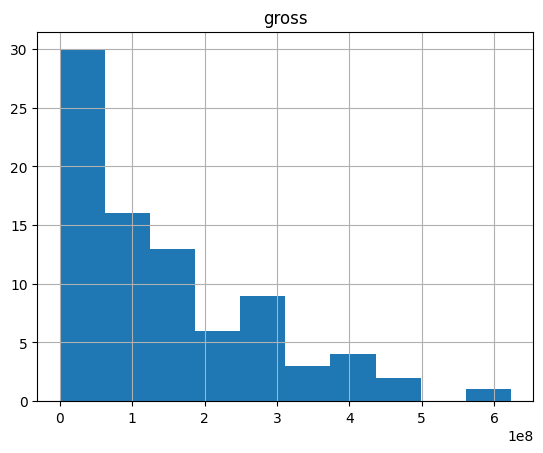

In [ ]:
# Un histograma es un gráfico que permite mostrar cómo se distribuyen los datos de una variable numérica(en este caso).
# En el histograma se suelen usar barras, cuya altura dependerá de la frecuencia de los datos, que corresponde al eje Y.
# En tanto, en el eje X podemos observar la variable de estudio.

imdb2.hist("gross")

In [ ]:
imdb2[imdb2["gross"].isnull()]

,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
7,Edward Hall,180,NaN,Drama|Romance,Restless,2012,English,UK,NaN,7.2,"Rufus Sewell,Hayley Atwell,Charlotte Rampling",434
26,Gnana Rajasekaran,153,NaN,Biography|Drama|History,Ramanujan,2014,English,India,NaN,7.0,"Mani Bharathi,Michael Lieber,Kevin McGowan",58
35,Jay Oliva,148,NaN,Action|Animation|Crime|Sci-Fi|Thriller,"Batman: The Dark Knight Returns, Part 2",2013,English,USA,3500000.0,8.4,"Michael Emerson,Mark Valley,Grey Griffin",5000
54,sin director,143,NaN,Drama|Horror|Thriller,The Ridges,2011,English,USA,17350.0,3.0,"Robbie Barnes,Alana Kaniewski,Brandon Landers",33
59,Timur Bekmambetov,141,NaN,Adventure|Drama|History,Ben-Hur,2016,English,USA,100000000.0,6.1,"Morgan Freeman,Ayelet Zurer,Moises Arias",0
60,Timur Bekmambetov,141,NaN,Adventure|Drama|History,Ben-Hur,2016,English,USA,100000000.0,6.0,"Morgan Freeman,Ayelet Zurer,Moises Arias",0
90,Sadyk Sher-Niyaz,135,NaN,Action|Biography|Drama|History,Queen of the Mountains,2014,English,Kyrgyzstan,1400000.0,8.7,"Elina Abai Kyzy,Aziz Muradillayev,Mirlan Abdul...",0


In [ ]:
imdb2[imdb2["gross"]>6e8]

,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
8,Joss Whedon,173,623279547.0,Action|Adventure|Sci-Fi,The Avengers,2012,English,USA,220000000.0,8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000


In [ ]:
imdb2["gross"].fillna(imdb2["gross"].mean(),inplace=True)

In [ ]:
imdb2.isnull().sum()

director_name           0
duration                0
gross                   0
genres                  1
movie_title             0
title_year              0
language                0
country                 0
budget                  4
imdb_score              0
actors                  0
movie_facebook_likes    0
dtype: int64

### 3.1.4 Variable: **género de la película**


In [ ]:
imdb2["genres"].value_counts()

Action|Adventure|Sci-Fi                     9
Drama                                       5
Crime|Drama|Thriller                        5
Biography|Drama|History                     4
Adventure|Fantasy                           3
Drama|Romance                               3
Action|Adventure|Thriller                   3
Action|Adventure|Fantasy                    2
Crime|Drama|Mystery|Thriller                2
Action|Adventure|Fantasy|Sci-Fi             2
Action|Adventure|Sci-Fi|Thriller            2
Action|Adventure|Drama                      2
Adventure|Drama|History                     2
Crime|Drama                                 2
Drama|History|Thriller                      2
Biography|Drama|Sport|War                   2
Adventure|Drama                             1
Action|Biography|Drama|History              1
Action|Drama|War                            1
Action|Crime|Thriller                       1
Biography|Drama|Thriller                    1
Drama|Sport                       

In [ ]:
imdb2[imdb2["genres"].isnull()]

,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
11,Christopher Spencer,170,59696176.0,NaN,Son of God,2014,English,USA,22000000.0,5.6,"Roma Downey,Amber Rose Revah,Darwin Shaw",15000


Eliminamos el nulo

In [ ]:
imdb2.dropna(subset=["genres"], inplace=True)

### 3.1.5 Variable: **presupuesto**

array([[<Axes: title={'center': 'budget'}>]], dtype=object)

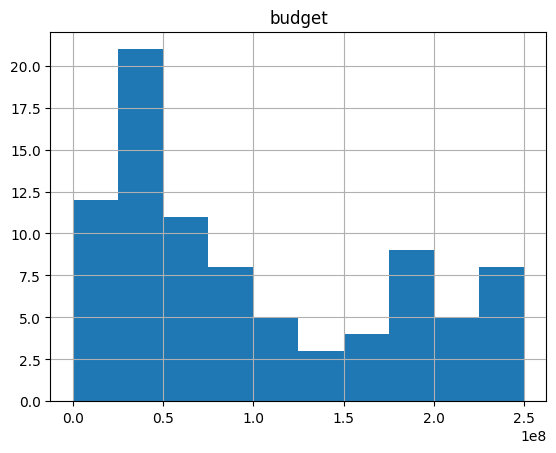

In [ ]:
imdb2.hist("budget")

In [ ]:
imdb2[imdb2["budget"].isnull()]

,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
7,Edward Hall,180,1.477886e+08,Drama|Romance,Restless,2012,English,UK,NaN,7.2,"Rufus Sewell,Hayley Atwell,Charlotte Rampling",434
26,Gnana Rajasekaran,153,1.477886e+08,Biography|Drama|History,Ramanujan,2014,English,India,NaN,7.0,"Mani Bharathi,Michael Lieber,Kevin McGowan",58
31,Mike Leigh,150,3.958500e+06,Biography|Drama|History,Mr. Turner,2014,English,UK,NaN,6.8,"Lesley Manville,Ruth Sheen,Karl Johnson",0
93,Richard J. Lewis,134,7.501404e+06,Comedy|Drama,Barney's Version,2010,English,Canada,NaN,7.3,"Mark Addy,Atom Egoyan,Paul Gross",0


In [ ]:
imdb2["budget"].fillna(imdb2["budget"].median(),inplace=True)

In [ ]:
imdb2.head()

,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
0,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,English,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,English,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,English,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000


## 3.3 Lógica de las variables

In [ ]:
imdb2.isnull().sum()

director_name           0
duration                0
gross                   0
genres                  0
movie_title             0
title_year              0
language                0
country                 0
budget                  0
imdb_score              0
actors                  0
movie_facebook_likes    0
dtype: int64

In [ ]:
imdb3 = imdb2.copy()

In [ ]:
imdb3.head()

,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
0,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,English,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,English,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,English,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000


array([[<Axes: title={'center': 'duration'}>]], dtype=object)

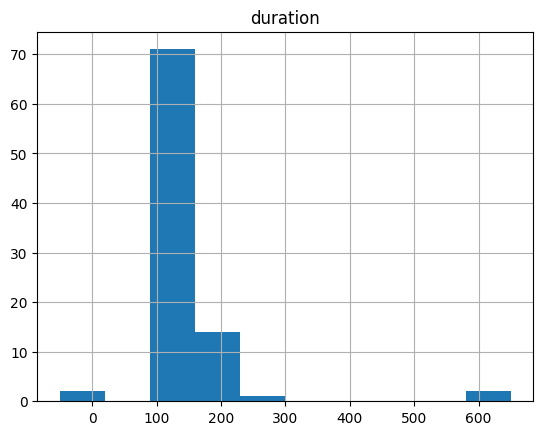

In [ ]:
imdb3.hist("duration")

Observamos la presencia de outliers y vamos a localizarlos

### 3.3.1 Tratamiento de outliers

In [ ]:
imdb3[imdb3["duration"]<50]

,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
6,Peter Jackson,-50,303001229.0,Adventure|Fantasy,The Hobbit: An Unexpected Journey,2012,English,USA,180000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",166000
96,Clint Eastwood,5,47034272.0,Biography|Drama|Music|Musical,Jersey Boys,2014,English,USA,40000000.0,6.9,"Johnny Cannizzaro,Steve Schirripa,Scott Vance",16000


In [ ]:
imdb3[imdb3["duration"]>300]

,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
15,Quentin Tarantino,580,162804648.0,Drama|Western,Django Unchained,2012,English,USA,100000000.0,8.5,"Leonardo DiCaprio,Christoph Waltz,Ato Essandoh",199000
32,Gore Verbinski,650,89289910.0,Action|Adventure|Western,The Lone Ranger,2013,English,USA,215000000.0,6.5,"Johnny Depp,Ruth Wilson,Tom Wilkinson",48000


Hay varias formas de reemplazarlos

### 3.3.1.1 Primera opción: funciones *iloc* y *loc* de pandas

iloc[i, j] : Devuelve el elemento que se encuentra en la fila i y la columna j del DataFrame

In [ ]:
imdb3.iloc[6,:]

director_name                                   Peter Jackson
duration                                                  -50
gross                                             303001229.0
genres                                      Adventure|Fantasy
movie_title                 The Hobbit: An Unexpected Journey
title_year                                               2012
language                                              English
country                                                   USA
budget                                            180000000.0
imdb_score                                                7.9
actors                  Aidan Turner,Adam Brown,James Nesbitt
movie_facebook_likes                                   166000
Name: 6, dtype: object

loc[] es un método para seleccionar y filtrar datos en un DataFrame de Pandas. El método loc[] toma uno o dos argumentos, que pueden ser una etiqueta de fila o una matriz booleana.

In [ ]:
imdb3.loc[(imdb3["duration"]<50) |(imdb3["duration"]>300),'duration'] = imdb3["duration"].mean()

array([[<Axes: title={'center': 'duration'}>]], dtype=object)

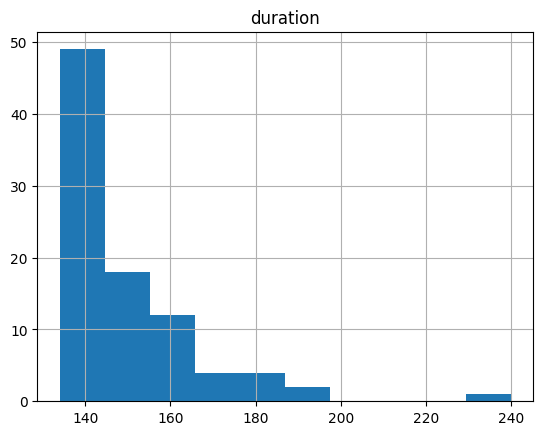

In [ ]:
imdb3.hist("duration")

### 3.3.1.2 Segunda opción: función *np.where* de numpy

In [ ]:
imdb3 = imdb2.copy()

In [ ]:
imdb3['duration']= np.where(imdb3['duration']<=50,imdb3["duration"].mean(),imdb3['duration'])

In [ ]:
imdb3['duration']= np.where(imdb3['duration']>300,imdb3["duration"].mean(),imdb3['duration'])

array([[<Axes: title={'center': 'duration'}>]], dtype=object)

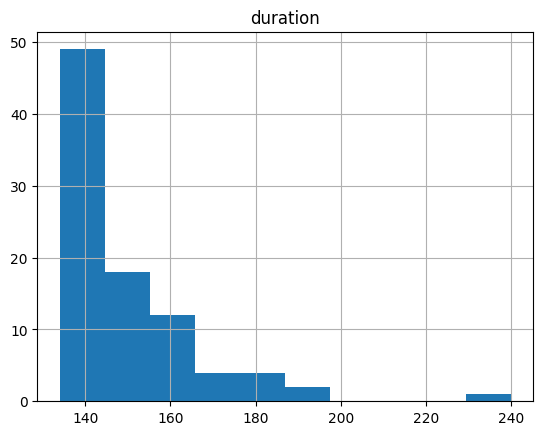

In [ ]:
imdb3.hist("duration")

### 3.3.1.3 Tercera opción: función *drop* de pandas

In [ ]:
imdb3 = imdb2.copy()

In [ ]:
imdb3[(imdb3["duration"]<50) |(imdb3["duration"]>300)].index

Int64Index([6, 15, 32, 96], dtype='int64')

In [ ]:
len(imdb3)

90

In [ ]:
imdb3.drop(imdb3[(imdb3["duration"]<50) |(imdb3["duration"]>300)].index, inplace=True)

In [ ]:
len(imdb3)

86

### 3.3.2 Tratamiento de la variable género

In [ ]:
genero_list=imdb3["genres"].str.split("|", expand=True)

In [ ]:
genero_list

,0,1,2,3,4
0,Biography,Comedy,Crime,Drama,None
1,Action,Adventure,Sci-Fi,None,None
2,Crime,Drama,Mystery,Thriller,Western
3,Drama,None,None,None,None
4,Adventure,Fantasy,None,None,None
...,...,...,...,...,...
91,Action,Adventure,Thriller,None,None
92,Biography,Drama,History,None,None
93,Comedy,Drama,None,None,None
94,Biography,Drama,Thriller,None,None


In [ ]:
genero_list.fillna('sin genero', inplace=True)

In [ ]:
for i in genero_list:
  imdb3["genero_"+str(i)]=genero_list[i]

In [ ]:
imdb3

,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,genero_0,genero_1,genero_2,genero_3,genero_4
0,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000,Biography,Comedy,Crime,Drama,sin genero
1,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,English,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000,Action,Adventure,Sci-Fi,sin genero,sin genero
2,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,English,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000,Crime,Drama,Mystery,Thriller,Western
3,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,English,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0,Drama,sin genero,sin genero,sin genero,sin genero
4,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000,Adventure,Fantasy,sin genero,sin genero,sin genero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Tony Gilroy,135,113165635.0,Action|Adventure|Thriller,The Bourne Legacy,2012,English,USA,125000000.0,6.7,"Jeremy Renner,Scott Glenn,Stacy Keach",31000,Action,Adventure,Thriller,sin genero,sin genero
92,Steve McQueen,134,56667870.0,Biography|Drama|History,12 Years a Slave,2013,English,USA,20000000.0,8.1,"Quvenzhané Wallis,Scoot McNairy,Taran Killam",83000,Biography,Drama,History,sin genero,sin genero
93,Richard J. Lewis,134,7501404.0,Comedy|Drama,Barney's Version,2010,English,Canada,72500000.0,7.3,"Mark Addy,Atom Egoyan,Paul Gross",0,Comedy,Drama,sin genero,sin genero,sin genero
94,Paul Greengrass,134,107100855.0,Biography|Drama|Thriller,Captain Phillips,2013,English,USA,55000000.0,7.9,"Tom Hanks,Chris Mulkey,Michael Chernus",65000,Biography,Drama,Thriller,sin genero,sin genero


In [ ]:
del(imdb3["genres"])

Como siguientes pasos analizar las variables restantes:
- language
- country
- actors (separarlo)
- imdb_score
- movie_facebook_likes

Además, si se observan:
- Datos que son outliers deberán limpiarlos!
- Columnas con poca utilidad podrán borrarlas!